In [1]:
%run init.ipynb

# $Z$-, $X$-, $Y$- and Bell's basis

In [2]:
def mbk_xyzBB(matrix, *bpos):
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        if base[j] == 'x' or base[j] == 'y':
            for k in range(len(lst[j])):
                matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
        elif base[j] == 'BB':
            for k in range(len(lst[j])):
                matrix_aux = BBasis(matrix_aux, lst[j][k])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'BB':
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'PP' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'QQ' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'RR' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'SS' + poss_bin[j][n-lst[i][k][1]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")\
                                .replace("PP", "\Phi_{+}").replace("QQ", "\Phi_{-}")\
                                .replace("RR", "\Psi_{+}").replace("SS", "\Psi_{-}")
                        Psi += val[j]*Ket(string)
            return Psi

In [3]:
def xyzBasis(matrix, *pos, base='x'):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        if base == 'x':
            plus =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if base == 'y':
            plus  =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus =  (-1j/sqrt(2))*(pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if char[n-1-lst[0]] == str(0):
            #print('1st')
            psi_f = psi_mod[j] * plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0]] == str(1):
            #print('2nd')
            psi_f = psi_mod[j] * minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

In [4]:
def BBasis(matrix, *pos):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        # 00 = phi_plus, 01 = phi_minus, 10 = psi_plus, 11 = psi_minus
        phi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        phi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        psi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        psi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * phi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * phi_minus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * psi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * psi_minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

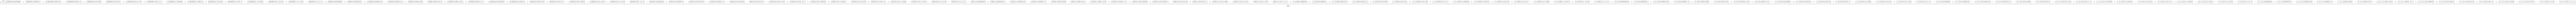

In [7]:
ψ = (1/sqrt(2))*(pbk('P+Rr-l1') + pbk('P-Rl+r0'))
mysim(mbk(ψ))

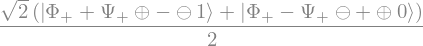

In [16]:
mysim(mbk_xyzBB( ψ, ('y', 3, 1), ('BB', (8,7), (5,4)), ('x', 6, 2) ) )

In [132]:
"""
Return Psi or rho in bra-ket notation
Sent Psi - return Psi in bra-ket notation
Send rho - return rho in bra-ket notation
"""
def mbk(matrix, positions=-1, dim=2):
    """
    Args:
        matrix (sympy.matrices.dense.MutableDenseMatrix): The input must be a sympy array.
                                            It can be a state vector or a density matrix

    Returns:
        Prints the matrix in Dirac notation
    """
    #############################################################################
    def convert_dim(x, dim, min_digits):
        """
        Helper function that checks how many digits the bra-ket will 
        have based on the dimension and size of the input matrix
        """
        digits = '0123456789'[:dim]
        result = ''
        while x > 0 or len(result) < min_digits:
            x, digit = divmod(x, dim)
            result = digits[digit] + result
        return result
    #############################################################################
    def create_order(string, positions):
        order = []
        new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
        inverted_string = string[::-1]
        j = 0
        for i in range(len(string)):
            if i in new_pos:
                if i==0:
                    order.append(string[0])
                    j=i+1
                else:
                    order.append(string[j:i])
                    order.append(string[i])
                    j=i+1
        order = [x for x in order if x != '']
        list_length = np.sum(np.fromiter((len(x) for x in order), dtype=int))
        if len(string) != list_length:
            order.append(string[new_pos[-1]+1:len(string)])
        return order
    #############################################################################
    pos = []
    pos_bin = []
    val = []
    if isinstance(matrix, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix.shape
        """
        If the row == 1 the notation will be Bra, if the column == 1 the notation will be Ket and if 
        it doesn't fit in any of these cases, then it's because it's a density matrix and will be handled by 'else'
        """
        if n_linhas == 1:
            Psi = 0
            x = len(matrix)
            for i in range(x):
                if matrix[i] != 0:
                    val.append(matrix[i])
                    pos.append(i)
                    pos_bin.append(convert_dim(i, dim, int(math.ceil(math.log(x)/math.log(dim)))))
            for i in range(len(val)):
                Psi = val[i] * Bra(pos_bin[i]) + Psi
            return simplify(Psi)
        if n_colunas == 1:
            Psi = 0
            x = len(matrix)
            for i in range(x):
                if matrix[i] != 0:
                    val.append(matrix[i])
                    pos.append(i)
                    pos_bin.append(convert_dim(i, dim, int(math.ceil(math.log(x)/math.log(dim)))))
            for i in range(len(val)):
                if positions != -1:
                    order = []
                    order = create_order(pos_bin[i], positions)
                    Psi = val[i] * reduce(tp, [Ket(x) for x in order]) + Psi
                else:
                    Psi = val[i] * Ket(pos_bin[i]) + Psi
            return Psi
        else:
            m, n = matrix.shape
            rho = 0
            for i in range(m):
                for j in range(n):
                    if matrix[i, j] != 0:
                        val.append(matrix[i, j])
                        pos.append((i, j))
                        pos_bin.append((convert_dim(i, dim, int(math.ceil(math.log(m)/math.log(dim)))),\
                                             convert_dim(j, dim, int(math.ceil(math.log(m)/math.log(dim))))))
            for i in range(len(val)):
                rho = val[i] * (Ket(pos_bin[i][0])) * (Bra(pos_bin[i][1])) + rho
            return rho

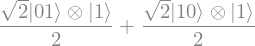

In [135]:
ψ = (1/sqrt(2))*(pbk('011') + pbk('101'))
mbk(ψ, [0])

In [ ]:
    def create_order(string, positions):
        order = []
        new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
        inverted_string = string[::-1]
        j = 0
        for i in range(len(string)):
            if i in new_pos:
                if i==0:
                    order.append(string[0])
                    j=i+1
                else:
                    order.append(string[j:i])
                    order.append(string[i])
                    j=i+1
        order = [x for x in order if x != '']
        list_length = np.sum(np.fromiter((len(x) for x in order), dtype=int))
        if len(string) != list_length:
            order.append(string[new_pos[-1]+1:len(string)])
        return order

In [256]:
def create_order(string, positions):
    order = []
    positions = sorted(positions, reverse=False)
    print(positions)
    #new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
    #inverted_string = string[::-1]
    j = 0
    for i in range(len(string)):
        if i in positions:
            order.append(string[j-1:i+1])
            order.append(string[i+1:])
            print(order)
            j=i
        j+=1
    return order

In [257]:
string = '10110011'
positions = [6,1]
order = create_order(string, positions)
order

[1, 6]
['10', '110011']
['10', '110011', '01', '1']


['10', '110011', '01', '1']

# $Z$-, $X$-, $Y$- and Bell's basis

In [7]:
def mbk_xyzBB(matrix, *bpos, positions=-1):
    #############################################################################
    def create_order(string, positions):
        order = []
        new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
        inverted_string = string[::-1]
        j = 0
        for i in range(len(string)):
            if i in new_pos:
                if i==0:
                    order.append(string[0])
                    j=i+1
                else:
                    order.append(string[j:i])
                    order.append(string[i])
                    j=i+1
        order = [x for x in order if x != '']
        list_length = np.sum(np.fromiter((len(x) for x in order), dtype=int))
        if len(string) != list_length:
            order.append(string[new_pos[-1]+1:len(string)])
        return order
    #############################################################################
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        if base[j] == 'x' or base[j] == 'y':
            for k in range(len(lst[j])):
                matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
        elif base[j] == 'BB':
            for k in range(len(lst[j])):
                matrix_aux = BBasis(matrix_aux, lst[j][k])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'BB':
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'PP' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'QQ' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'RR' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'SS' + poss_bin[j][n-lst[i][k][1]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")\
                                .replace("PP", "\Phi_{+}").replace("QQ", "\Phi_{-}")\
                                .replace("RR", "\Psi_{+}").replace("SS", "\Psi_{-}")
                        if positions != -1:
                            order = []
                            order = create_order(string, positions)
                            Psi += val[j] * reduce(tp, [Ket(x) for x in order])
                        else:
                            Psi += val[j]*Ket(string)
            return Psi

In [8]:
def xyzBasis(matrix, *pos, base='x'):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        if base == 'x':
            plus =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if base == 'y':
            plus  =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus =  (-1j/sqrt(2))*(pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if char[n-1-lst[0]] == str(0):
            #print('1st')
            psi_f = psi_mod[j] * plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0]] == str(1):
            #print('2nd')
            psi_f = psi_mod[j] * minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

In [9]:
def BBasis(matrix, *pos):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        # 00 = phi_plus, 01 = phi_minus, 10 = psi_plus, 11 = psi_minus
        phi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        phi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        psi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        psi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * phi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * phi_minus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * psi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * psi_minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

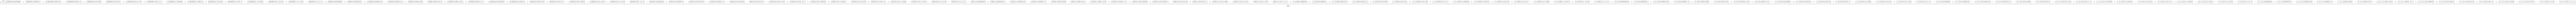

In [10]:
ψ = (1/sqrt(2))*(pbk('P+Rr-l1') + pbk('P-Rl+r0'))
mysim(mbk(ψ))

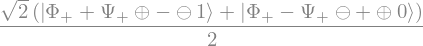

In [11]:
mysim(mbk_xyzBB( ψ, ('y', 3, 1), ('BB', (8,7), (5,4)), ('x', 6, 2) ) )

In [12]:
"""
Return Psi or rho in bra-ket notation
Sent Psi - return Psi in bra-ket notation
Send rho - return rho in bra-ket notation
"""
def mbk(matrix, positions=-1, dim=2):
    """
    Args:
        matrix (sympy.matrices.dense.MutableDenseMatrix): The input must be a sympy array.
                                            It can be a state vector or a density matrix

    Returns:
        Prints the matrix in Dirac notation
    """
    #############################################################################
    def convert_dim(x, dim, min_digits):
        """
        Helper function that checks how many digits the bra-ket will 
        have based on the dimension and size of the input matrix
        """
        digits = '0123456789'[:dim]
        result = ''
        while x > 0 or len(result) < min_digits:
            x, digit = divmod(x, dim)
            result = digits[digit] + result
        return result
    #############################################################################
    def create_order(string, positions):
        order = []
        new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
        inverted_string = string[::-1]
        j = 0
        for i in range(len(string)):
            if i in new_pos:
                if i==0:
                    order.append(string[0])
                    j=i+1
                else:
                    order.append(string[j:i])
                    order.append(string[i])
                    j=i+1
        order = [x for x in order if x != '']
        list_length = np.sum(np.fromiter((len(x) for x in order), dtype=int))
        if len(string) != list_length:
            order.append(string[new_pos[-1]+1:len(string)])
        return order
    #############################################################################
    pos = []
    pos_bin = []
    val = []
    if isinstance(matrix, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix.shape
        """
        If the row == 1 the notation will be Bra, if the column == 1 the notation will be Ket and if 
        it doesn't fit in any of these cases, then it's because it's a density matrix and will be handled by 'else'
        """
        if n_linhas == 1:
            Psi = 0
            x = len(matrix)
            for i in range(x):
                if matrix[i] != 0:
                    val.append(matrix[i])
                    pos.append(i)
                    pos_bin.append(convert_dim(i, dim, int(math.ceil(math.log(x)/math.log(dim)))))
            for i in range(len(val)):
                Psi = val[i] * Bra(pos_bin[i]) + Psi
            return simplify(Psi)
        if n_colunas == 1:
            Psi = 0
            x = len(matrix)
            for i in range(x):
                if matrix[i] != 0:
                    val.append(matrix[i])
                    pos.append(i)
                    pos_bin.append(convert_dim(i, dim, int(math.ceil(math.log(x)/math.log(dim)))))
            for i in range(len(val)):
                if positions != -1:
                    order = []
                    order = create_order(pos_bin[i], positions)
                    Psi = val[i] * reduce(tp, [Ket(x) for x in order]) + Psi
                else:
                    Psi = val[i] * Ket(pos_bin[i]) + Psi
            return Psi
        else:
            m, n = matrix.shape
            rho = 0
            for i in range(m):
                for j in range(n):
                    if matrix[i, j] != 0:
                        val.append(matrix[i, j])
                        pos.append((i, j))
                        pos_bin.append((convert_dim(i, dim, int(math.ceil(math.log(m)/math.log(dim)))),\
                                             convert_dim(j, dim, int(math.ceil(math.log(m)/math.log(dim))))))
            for i in range(len(val)):
                rho = val[i] * (Ket(pos_bin[i][0])) * (Bra(pos_bin[i][1])) + rho
            return rho

In [13]:
def mbk_xyzBB(matrix, *bpos, positions=-1):
    #############################################################################
    def create_order(string, positions):
        order = []
        new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
        inverted_string = string[::-1]
        j = 0
        for i in range(len(string)):
            if i in new_pos:
                if i==0:
                    order.append(string[0])
                    j=i+1
                else:
                    order.append(string[j:i])
                    order.append(string[i])
                    j=i+1
        order = [x for x in order if x != '']
        list_length = np.sum(np.fromiter((len(x) for x in order), dtype=int))
        if len(string) != list_length:
            order.append(string[new_pos[-1]+1:len(string)])
        return order
    #############################################################################
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        if base[j] == 'x' or base[j] == 'y':
            for k in range(len(lst[j])):
                matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
        elif base[j] == 'BB':
            for k in range(len(lst[j])):
                matrix_aux = BBasis(matrix_aux, lst[j][k])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'BB':
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'PP' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'QQ' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'RR' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'SS' + poss_bin[j][n-lst[i][k][1]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")\
                                .replace("PP", "\Phi_{+}").replace("QQ", "\Phi_{-}")\
                                .replace("RR", "\Psi_{+}").replace("SS", "\Psi_{-}")
                        if positions != -1:
                            order = []
                            order = create_order(string, positions)
                            Psi += val[j] * reduce(tp, [Ket(x) for x in order])
                        else:
                            Psi += val[j]*Ket(string)
            return Psi

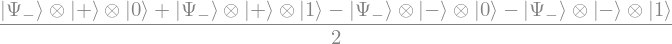

In [14]:
ψ = (1/2)*(pbk('0110') + pbk('0111') - pbk('1010') - pbk('1011'))
mysim(mbk_xyzBB(ψ, ('BB',(3,2)), ('x', 1), positions=[1]))

In [70]:
def dividir_intervalo(n, positions):
    lista = []
    total_caracteres = n
    inicio = 0
    for pos in positions:
        fim = min(pos, total_caracteres - 1)
        lista.append([inicio, fim])
        inicio = fim + 1
    lista.append([inicio, total_caracteres - 1])
    # Remover elementos repetidos consecutivos
    lista_sem_repeticao = [lista[0]]
    for i in range(1, len(lista)):
        if lista[i] != lista[i - 1]:
            lista_sem_repeticao.append(lista[i])
    # Transformar intervalos com início e fim iguais em intervalos de tamanho 1
    lista_final = []
    for intervalo in lista_sem_repeticao:
        if intervalo[0] == intervalo[1]:
            lista_final.append([intervalo[0]])
        else:
            lista_final.append(intervalo)
    return lista_final

In [73]:
n = 8
positions = [6]
dividir_intervalo(n, positions)

In [80]:
def create_order(string, positions):
    order = []
    new_pos = [len(string)-1-p for p in sorted(positions, reverse=True)]
    positions = dividir_intervalo(len(string), new_pos)
    for i in range(len(new_pos)):
        print(string)
        print(positions)
        print(new_pos[i])
        order.append(string[new_pos[i][0]:new_pos[i][1]])        
    return order

In [81]:
string = '100110110'
positions = [0]
create_order(string, positions)

100110110
[[0, 8], [9, 8]]
8


TypeError: 'int' object is not subscriptable

In [21]:
string = '100110110'
positions = [[7],[6,3],[2,0]]
create_order(string, positions)

[[6, 7], [5, 4, 3], [2, 1, 0]]
[[6, 7], [5, 4, 3], [2, 1, 0]]


TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [83]:
ψ1 = 0.22*pbk('00') + 0.2 * pbk('10')
mbk(ψ1)

In [85]:
ψ2 = pbk('0000')
mbk(ψ2)

In [86]:
mbk(comp_sys(ψ1, ψ2))